# ***Неочевидные деревья***

Accuracy on training data: 1.0
Accuracy on test data: 0.8604166666666667


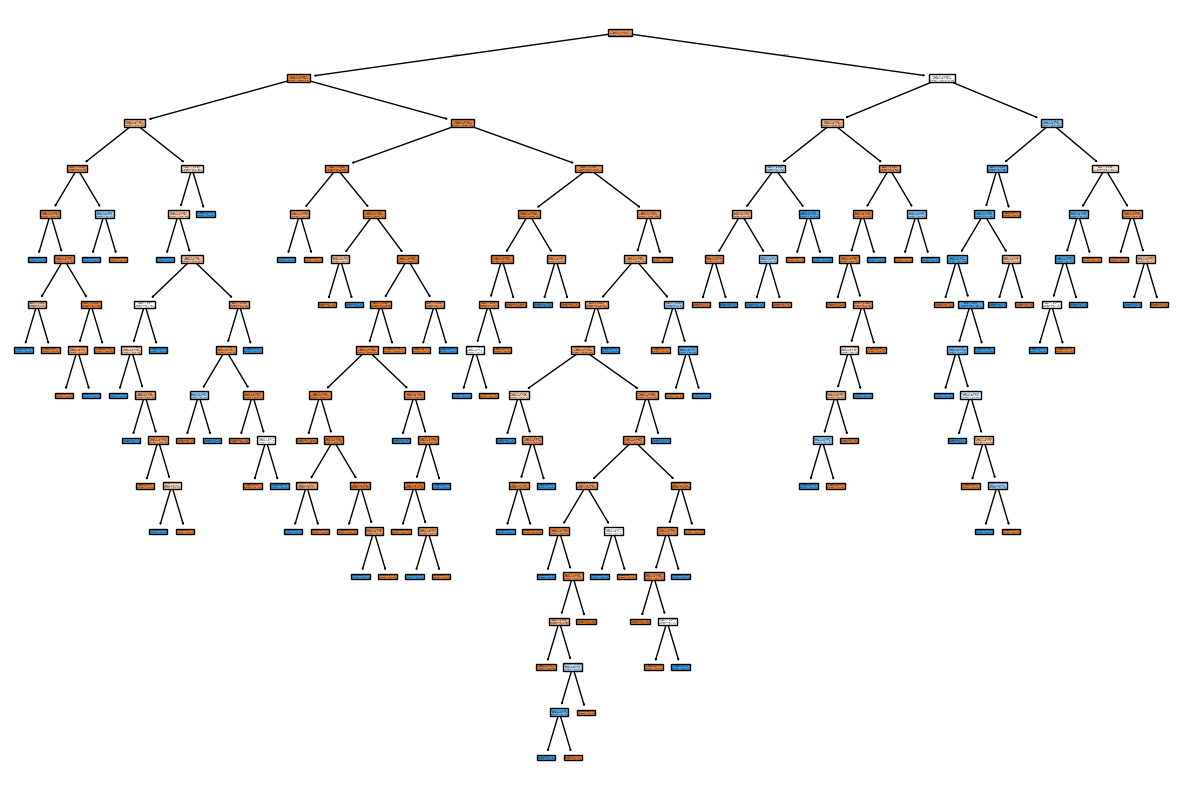

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загружаем данные
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Превращаем задачу в классификацию: 1 - хорошее вино, 0 - плохое вино
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Разделяем признаки и целевую переменную
X = data.drop(columns=['quality'])
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модель дерева решений без ограничения глубины
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Accuracy on training data: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy on test data: {accuracy_score(y_test, y_test_pred)}")

plt.figure(figsize=(15,10))
plot_tree(model, filled=True)
plt.show()


## 1.   Является ли модель склонной к переобучению?
## 2.   Нравится ли эта модель в целом?
## 3.   Что можно сказать про точность на трейне равной?

## Ответ: Здесь очевидно, что модель переобучилась, потому что максимальная глубина дерева 17 и точность на тренировочной выборке равна 1.

# ***Ограниченная по глубине модель***

## Заметим, что здесь мы ограничиваем глубину модели на уровне 3

1. Как вы думаете изменится ли точность на тестовой выборке?
2. В какую сторону она изменится и из-за чего это происходит?

Accuracy on training data (limited depth): 0.90437890974084
Accuracy on test data (limited depth): 0.8645833333333334


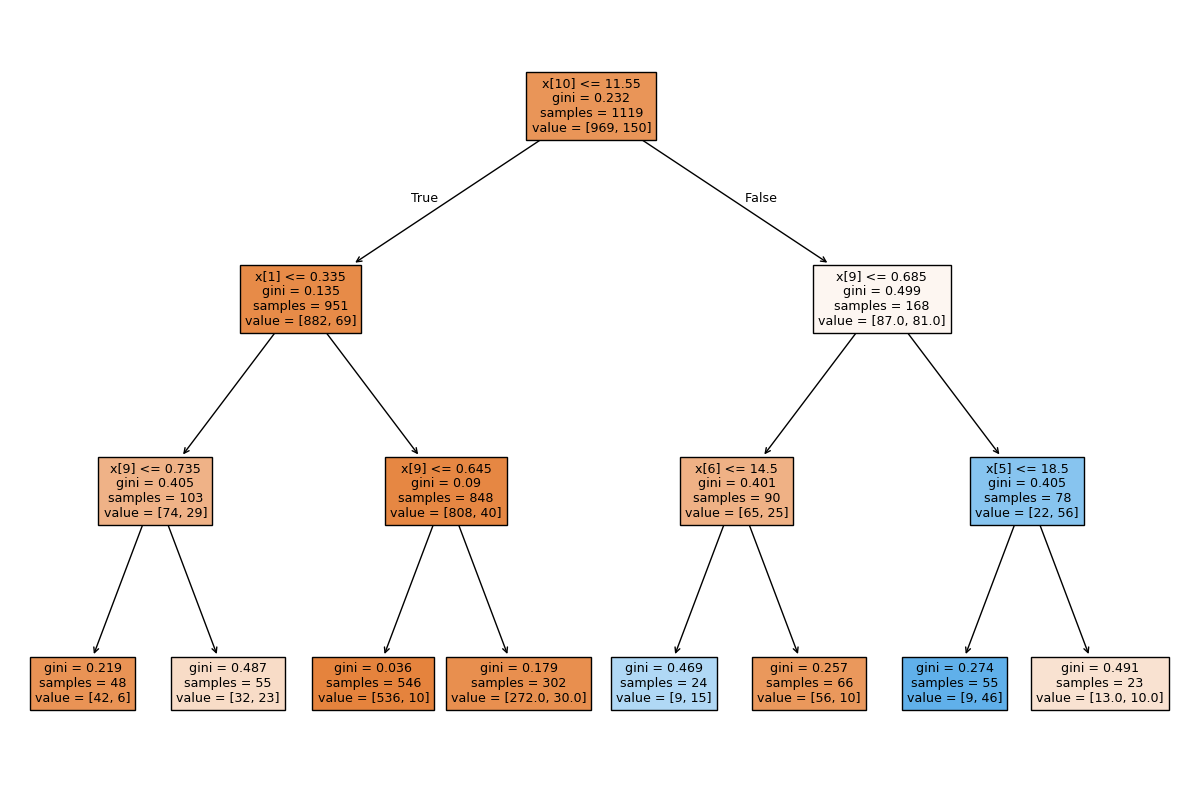

In [ ]:
# Ограничение глубины дерева
model_limited_depth = DecisionTreeClassifier(max_depth=3, random_state=42)

# Обучаем модель
model_limited_depth.fit(X_train, y_train)

# Оцениваем точность
y_train_pred_limited = model_limited_depth.predict(X_train)
y_test_pred_limited = model_limited_depth.predict(X_test)
print(f"Accuracy on training data (limited depth): {accuracy_score(y_train, y_train_pred_limited)}")
print(f"Accuracy on test data (limited depth): {accuracy_score(y_test, y_test_pred_limited)}")

# Визуализируем дерево с ограниченной глубиной
plt.figure(figsize=(15,10))
plot_tree(model_limited_depth, filled=True)
plt.show()

## Какие выводы вы можете сделать, учитывая, что точность нашей модели на тестовой выборке поднялась?

## Ответ: Это указывает на то, что переобученность нашей модели мешает давать нормальные результаты на тестовой выборке и ограничение дерева ***до глубины 3, уже поднимает нашу точность***!

# ***Подбор гиперпараметров***

Max depth: 2
Accuracy on training data: 0.8963360142984808
Accuracy on test data: 0.8645833333333334
------------------------------
Max depth: 3
Accuracy on training data: 0.90437890974084
Accuracy on test data: 0.8645833333333334
------------------------------
Max depth: 4
Accuracy on training data: 0.9249329758713136
Accuracy on test data: 0.8666666666666667
------------------------------
Max depth: 5
Accuracy on training data: 0.9374441465594281
Accuracy on test data: 0.8625
------------------------------
Max depth: 6
Accuracy on training data: 0.9463806970509383
Accuracy on test data: 0.88125
------------------------------
Max depth: 10
Accuracy on training data: 0.9830205540661304
Accuracy on test data: 0.8791666666666667
------------------------------
Max depth: 12
Accuracy on training data: 0.9946380697050938
Accuracy on test data: 0.8666666666666667
------------------------------
Max depth: 14
Accuracy on training data: 0.9973190348525469
Accuracy on test data: 0.86458333333333

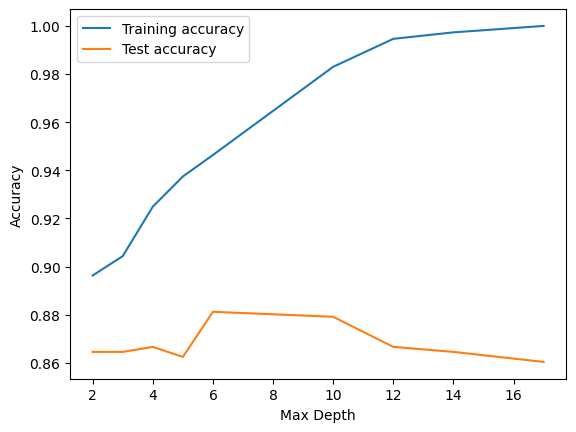

In [ ]:
depth_values = [2, 3, 4, 5, 6, 10, 12, 14, 17]
train_accuracies = []
test_accuracies = []

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Оцениваем точность на обучающих и тестовых данных
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Max depth: {depth}")
    print(f"Accuracy on training data: {train_accuracy}")
    print(f"Accuracy on test data: {test_accuracy}")
    print("-" * 30)

# Визуализируем зависимости
plt.plot(depth_values, train_accuracies, label="Training accuracy")
plt.plot(depth_values, test_accuracies, label="Test accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
print(f'Максимум на тесте: {max(test_accuracies)}')

Максимум на тесте: 0.88125


# ***Подбор min_samples_split и min_samples_leaf***

## Что это такое?

1. `min_samples_split`:
Этот параметр определяет минимальное количество образцов (примеров данных), которое должно быть в узле, чтобы этот узел можно было разделить на поддеревья.

2. `min_samples_leaf:`
Этот параметр задает минимальное количество образцов, которое должно находиться в каждом листовом узле. ***Лист — это узел, который не делится дальше.***

In [ ]:
# Эксперименты с параметрами min_samples_split и min_samples_leaf
min_samples_splits = [2, 3, 5, 7, 8, 10]
min_samples_leafs = [1, 2, 3, 5, 7, 8, 10]
test_a = []
for split in min_samples_splits:
    for leaf in min_samples_leafs:
        model_regularized = DecisionTreeClassifier(max_depth=6, min_samples_split=split, min_samples_leaf=leaf, random_state=42)
        model_regularized.fit(X_train, y_train)

        # Оцениваем точность
        train_accuracy = accuracy_score(y_train, model_regularized.predict(X_train))
        test_accuracy = accuracy_score(y_test, model_regularized.predict(X_test))
        test_a.append(test_accuracy)

        print(f"min_samples_split: {split}, min_samples_leaf: {leaf}")
        print(f"Accuracy on training data: {train_accuracy}")
        print(f"Accuracy on test data: {test_accuracy}")
        print("-" * 30)


min_samples_split: 2, min_samples_leaf: 1
Accuracy on training data: 0.9463806970509383
Accuracy on test data: 0.88125
------------------------------
min_samples_split: 2, min_samples_leaf: 2
Accuracy on training data: 0.9392314566577301
Accuracy on test data: 0.8645833333333334
------------------------------
min_samples_split: 2, min_samples_leaf: 3
Accuracy on training data: 0.934763181411975
Accuracy on test data: 0.8625
------------------------------
min_samples_split: 2, min_samples_leaf: 5
Accuracy on training data: 0.9338695263628239
Accuracy on test data: 0.8645833333333334
------------------------------
min_samples_split: 2, min_samples_leaf: 7
Accuracy on training data: 0.9329758713136729
Accuracy on test data: 0.8625
------------------------------
min_samples_split: 2, min_samples_leaf: 8
Accuracy on training data: 0.9302949061662198
Accuracy on test data: 0.8645833333333334
------------------------------
min_samples_split: 2, min_samples_leaf: 10
Accuracy on training data: 

In [ ]:
print(f'Максимум на тесте: {max(test_a)}')

Максимум на тесте: 0.88125
